In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(111)
var = ['X', 'Y']
labels = ['점0','점1','점2','점3','점4']
X = np.random.random_sample([5, 2]) * 10
df = pd.DataFrame(X, columns=var, index=labels) 
print(df)

           X         Y
점0  6.121702  1.690698
점1  4.360590  7.692625
점2  2.953253  1.491630
점3  0.224783  4.202245
점4  2.386821  3.376562


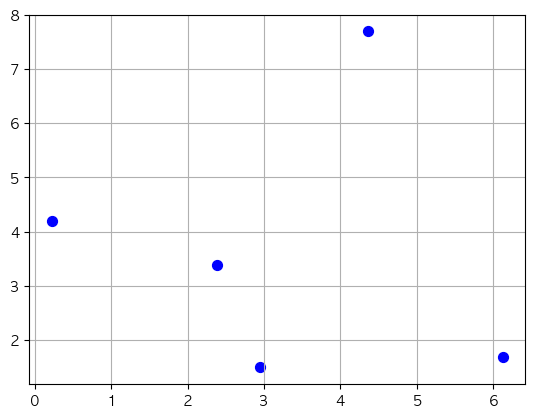

In [3]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)
plt.grid(True)
plt.show()

In [4]:
from scipy.spatial.distance import pdist, squareform
distmatrix = pdist(df, metric='euclidean') # 두 점 사이의 거리 계산
row_dist = pd.DataFrame(squareform(distmatrix), columns=labels, index=labels)
print(row_dist) # 두점 사이 거리 계산값 출력

          점0        점1        점2        점3        점4
점0  0.000000  6.254970  3.174696  6.409487  4.097740
점1  6.254970  0.000000  6.358690  5.411807  4.745963
점2  3.174696  6.358690  0.000000  3.846035  1.968201
점3  6.409487  5.411807  3.846035  0.000000  2.314338
점4  4.097740  4.745963  1.968201  2.314338  0.000000


In [5]:
from scipy.cluster.hierarchy import linkage # linkage() : 응집형 계층적 클러스터링 수행 
row_clusters = linkage(distmatrix, method='complete')
row_clusters

array([[2.        , 4.        , 1.96820089, 2.        ],
       [3.        , 5.        , 3.84603471, 3.        ],
       [0.        , 1.        , 6.25496953, 2.        ],
       [6.        , 7.        , 6.40948658, 5.        ]])

In [6]:
pd.DataFrame(row_clusters, columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
             index=['클러스터 %d' % (i+1) for i in range(row_clusters.shape[0])])


,클러스터ID_1,클러스터ID_2,거리,클러스터 멤버수
클러스터 1,2.0,4.0,1.968201,2.0
클러스터 2,3.0,5.0,3.846035,3.0
클러스터 3,0.0,1.0,6.254970,2.0
클러스터 4,6.0,7.0,6.409487,5.0


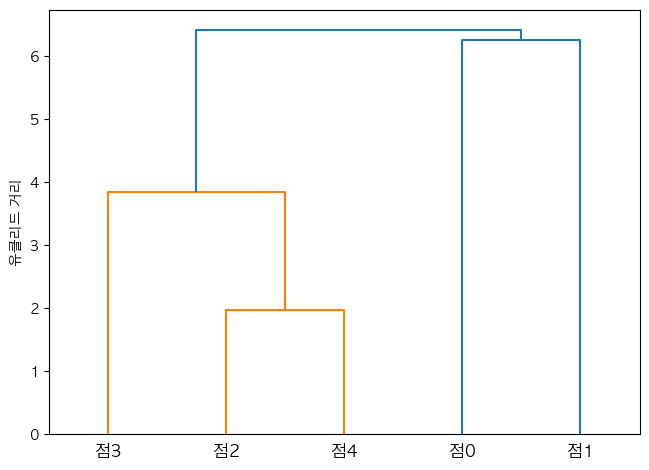

In [7]:
from scipy.cluster.hierarchy import dendrogram # dendrogram() : 클러스터의 계층 구조를 표현 
row_dendrogram = dendrogram(row_clusters, labels=labels)
plt.rcParams["font.family"] = 'AppleGothic'
plt.tight_layout()
plt.ylabel('유클리드 거리')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
# n_clusters : 최종 클러스터 개수
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete') 
labels = ac.fit_predict(X)
print('클러스터 분류 결과 :', labels)

클러스터 분류 결과 : [2 1 0 0 0]


In [11]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets") 
iris_df = iris.data
iris_df


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
# 레이블 인코딩(setosa:0 ~ virginica:2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df.Species)
iris_df.Species = le.transform(iris_df.Species)
iris_df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

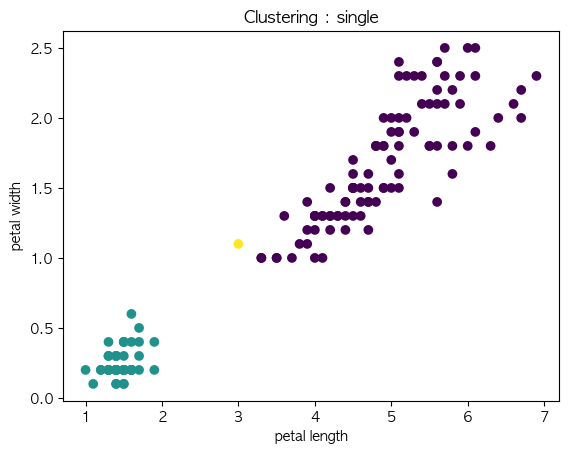

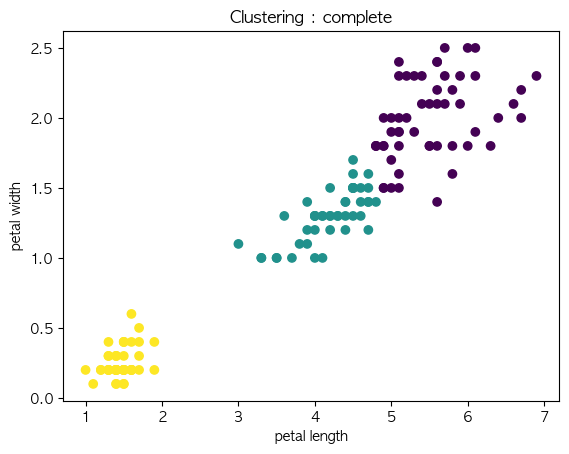

In [24]:
from sklearn.cluster import AgglomerativeClustering
#linkage = ['complete', 'average', 'ward'] # Centroid, Median은 오류 발생 
linkage = ['single', 'complete']
for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=i) # 'petal length'와 'petal width' column을 사용
    hier.fit(iris_df.iloc[:, 2:4])
    plt.scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=hier.labels_)
    plt.title('Clustering : ' + i)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
plt.show()

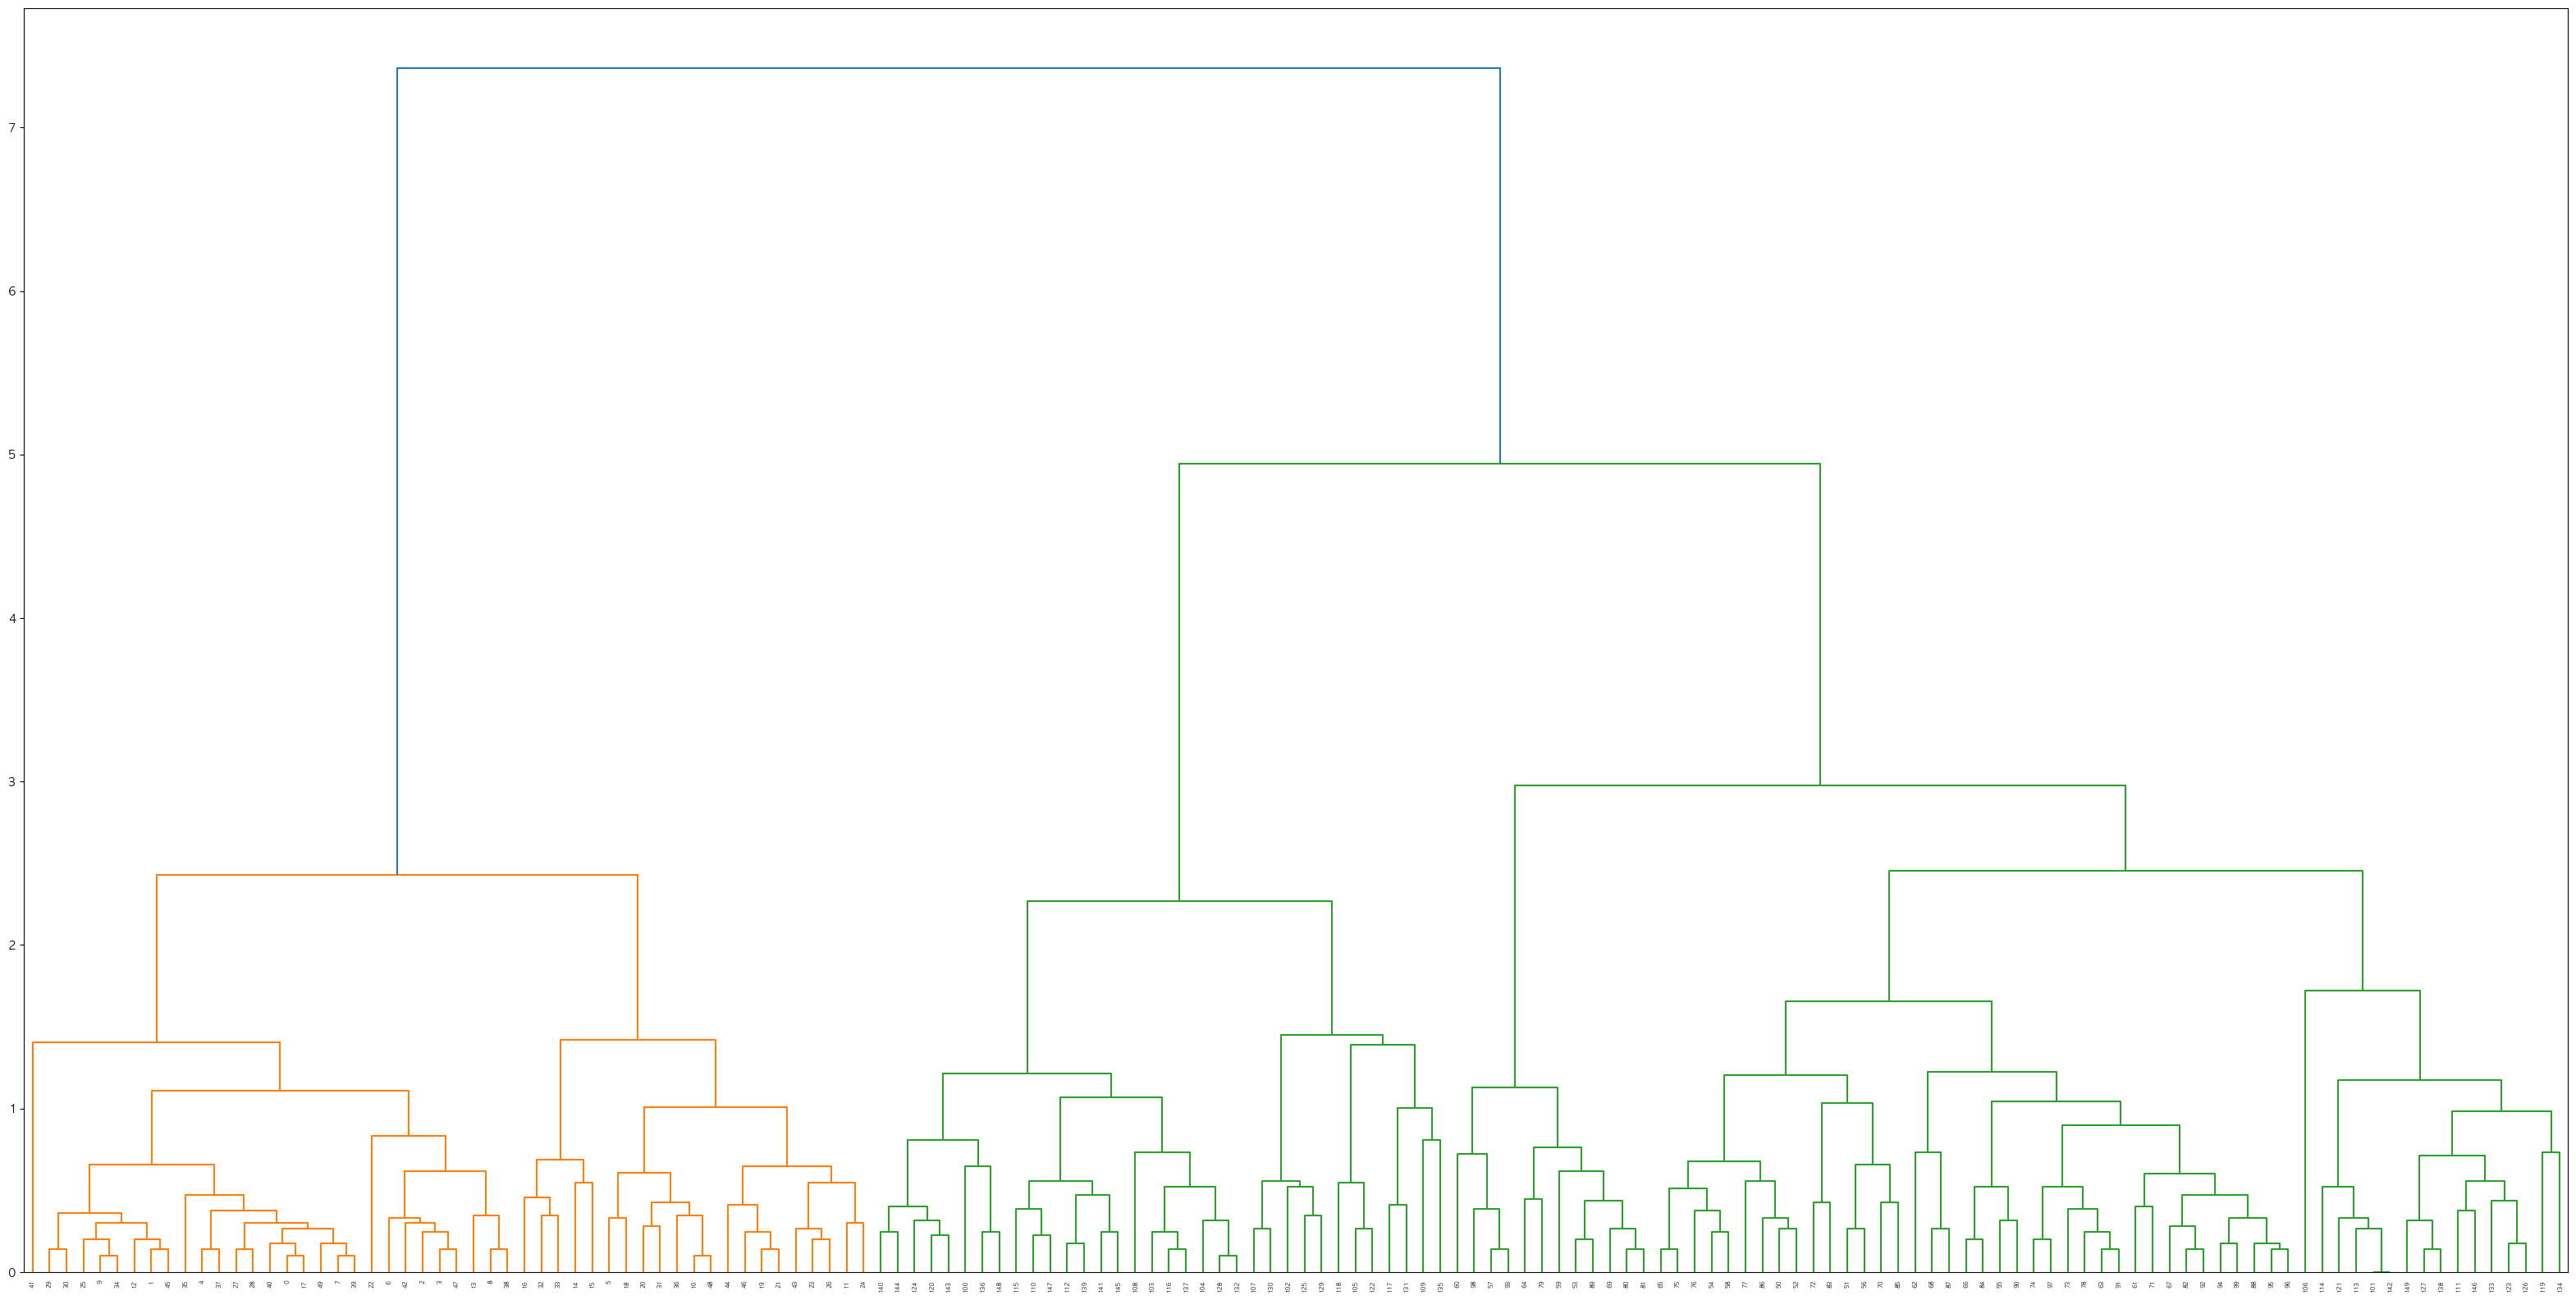

In [25]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
clustering = linkage(iris_df, method='complete') 
plt.figure(figsize=(40,20)) 
dendrogram(clustering)# 덴드로그램으로 표현 
plt.show()

In [26]:
from scipy.cluster.hierarchy import fcluster
# clustering : linkage()명령을 수행한 데이터.
predict = fcluster(clustering, 3, criterion='distance') 
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [27]:
# 클러스터링 할당 번호 재조정([1,3,2] -> [2,0,1])
import numpy as np
adjusted_pred = np.choose((predict-1), [0, 2, 1]).astype(np.int64)
adjusted_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [28]:
import pandas as pd
# 0 -> 'setosa', 1 -> 'versicolor', 2 -> 'virginica'로 변환
pred_name = le.inverse_transform(adjusted_pred)
origin_name = le.inverse_transform(iris_df.Species.values)
ct = pd.crosstab(origin_name, pred_name, rownames=["True"], colnames=["Predicted"],margins=True)
print(ct)


Predicted   setosa  versicolor  virginica  All
True                                          
setosa          50           0          0   50
versicolor       0          50          0   50
virginica        0          16         34   50
All             50          66         34  150


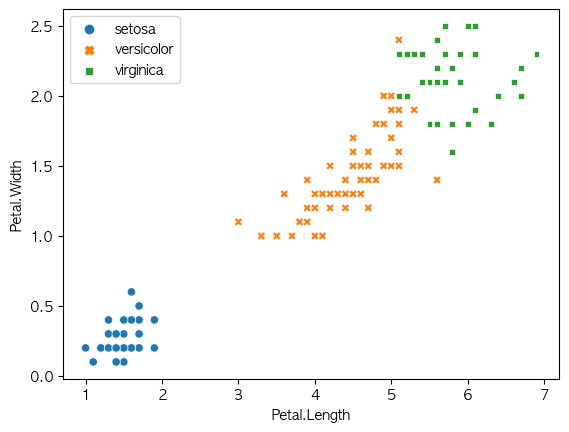

In [29]:
import seaborn as sns
ax = sns.scatterplot(x="Petal.Length", y="Petal.Width", hue=le.inverse_transform(adjusted_pred),
                     style=le.inverse_transform(adjusted_pred), data=iris_df)